In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
train_path = 'cats-and-dogs/train'
valid_path = 'cats-and-dogs/valid'
test_path = 'cats-and-dogs/test'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, 
                                                         target_size=(224,224), 
                                                         classes=['dog','cat'], 
                                                         batch_size=80)

valid_batches = ImageDataGenerator().flow_from_directory(valid_path, 
                                                         target_size=(224,224), 
                                                         classes=['dog','cat'], 
                                                         batch_size=16)

test_batches = ImageDataGenerator().flow_from_directory(test_path, 
                                                        target_size=(224,224), 
                                                        classes=['dog','cat'], 
                                                        batch_size=40)

Found 400 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [4]:
# def plots(ims, figsize=(12,6), rows=2, interp=False, titles=None):
#     if type(ims[0]) is np.ndarray:
#         ims = np.array(ims).astype(np.uint8)
#         if(ims.shape[-1] != 3):
#             ims = ims.transpose((0,2,3,1))
#     f = plt.figure(figsize=figsize)
#     cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows +1
#     for i in range(len(ims)):
#         sp = f.add_subplot(rows, cols, i+1)
#         sp.axis('Off')
#         if titles is not None:
#             sp.set_title(titles[i], fontsize=16)
#         plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
# imgs, labels = next(train_batches)

In [7]:
# plots(imgs, titles=labels)

In [8]:
vgg16_model = keras.applications.vgg16.VGG16(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [10]:
# Functional API > Sequential model

model = Sequential()

for layer in vgg16_model.layers[:-1]:  # Deleting last layer
    model.add(layer)

In [11]:
type(model)

keras.engine.sequential.Sequential

In [12]:
# "Zaleđivanje" svih layera

for layer in model.layers:
    layer.trainable = False

In [13]:
model.add(Dense(2, activation="softmax"))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [15]:
model.compile(loss="categorical_crossentropy", optimizer = 'adam', metrics=['accuracy'])

In [ ]:
model.fit_generator(train_batches, validation_data=valid_batches, validation_steps=5, epochs=10, steps_per_epoch=5, verbose=1)

Epoch 1/10
5/5 [==============================] - 804s 161s/step - loss: 0.1852 - acc: 0.9325 - val_loss: 0.4474 - val_acc: 0.8400
Epoch 2/10
5/5 [==============================] - 821s 164s/step - loss: 0.0970 - acc: 0.9700 - val_loss: 0.2286 - val_acc: 0.9600
Epoch 3/10
5/5 [==============================] - 833s 167s/step - loss: 0.0605 - acc: 0.9750 - val_loss: 0.2746 - val_acc: 0.9000
Epoch 4/10
5/5 [==============================] - 878s 176s/step - loss: 0.0383 - acc: 0.9850 - val_loss: 0.1288 - val_acc: 0.9200
Epoch 5/10
5/5 [==============================] - 864s 173s/step - loss: 0.0189 - acc: 0.9950 - val_loss: 0.2011 - val_acc: 0.9000
Epoch 6/10
5/5 [==============================] - 864s 173s/step - loss: 0.0091 - acc: 1.0000 - val_loss: 0.1002 - val_acc: 0.9600
Epoch 7/10
5/5 [==============================] - 829s 166s/step - loss: 0.0050 - acc: 1.0000 - val_loss: 0.1024 - val_acc: 0.9600
Epoch 8/10
2/5 [===========>..................] - ETA: 9:20 - loss: 0.0033 - acc: 1

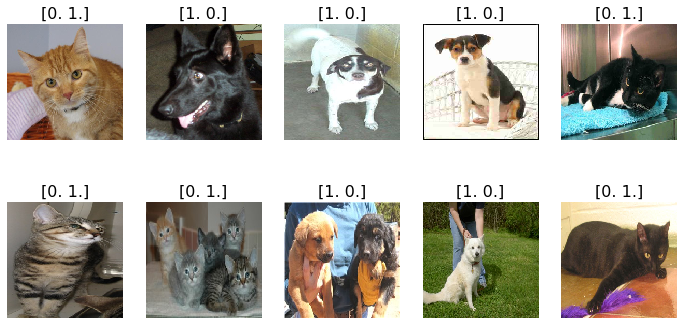

In [32]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [1]:
test_labels = test_labels[:,0]
test_labels

In [2]:
predictions = model.predict_generator(test_batches, steps=1, verbose=1)

In [3]:
print(predictions)

In [4]:
# cm = confusion_matrix(test_labels, predictions[:,0])

In [21]:
# def plot_confusion_matrix(cm, classes, normalize = False, title ='Confusion Matrix', cmap=plt.cm.Blues):
    
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting 'normalize=true'.
#     """
    
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)
    
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)
    
    
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, cm[i, j],
#                 horizontalalignment='center',
#                 color="white" if cm[i, j] > thresh else "black")
        
#     plt.tight_layout()
#     plt.ylabel('true label')
#     plt.xlabel('Predicted label')

In [5]:
# cm_plot_labels = ['cat','dog']
# plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')